01. Import Relevant libraries & CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cyclist_cleaned = pd.read_csv("C:/Users/User/Downloads/Divvy_Trips_2020_Q1/cyclist_cleaned.csv")

print("Data Loaded Successfully")
cyclist_cleaned.head()

Data Loaded Successfully


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,7.516667,Tuesday
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,3.716667,Thursday
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2.850000,Thursday
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,8.816667,Monday
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,5.533333,Thursday


In [2]:
# Revalidating Dataset.
cyclist_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426677 entries, 0 to 426676
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426677 non-null  object 
 1   rideable_type       426677 non-null  object 
 2   started_at          426677 non-null  object 
 3   ended_at            426677 non-null  object 
 4   start_station_name  426677 non-null  object 
 5   start_station_id    426677 non-null  int64  
 6   end_station_name    426677 non-null  object 
 7   end_station_id      426677 non-null  float64
 8   start_lat           426677 non-null  float64
 9   start_lng           426677 non-null  float64
 10  end_lat             426677 non-null  float64
 11  end_lng             426677 non-null  float64
 12  member_casual       426677 non-null  object 
 13  ride_length         426677 non-null  float64
 14  day_of_week         426677 non-null  object 
dtypes: float64(6), int64(1), object(8)

In [3]:
cyclist_cleaned.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,ride_length
count,426677.000000,426677.000000,426677.000000,426677.000000,426677.000000,426677.000000,426677.000000
mean,209.568838,209.109851,41.897850,-87.644139,41.898002,-87.644236,22.126072
std,162.936362,162.912269,0.038088,0.022657,0.038324,0.022653,619.193669
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700,0.016667
25%,77.000000,77.000000,41.880300,-87.655000,41.880300,-87.655500,5.483333
50%,176.000000,175.000000,41.890600,-87.639900,41.890600,-87.640600,9.166667
75%,297.000000,296.000000,41.916000,-87.629500,41.916000,-87.629500,15.833333
max,675.000000,675.000000,42.064900,-87.549400,42.064900,-87.549400,156450.400000


In [5]:
cyclist_cleaned.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'day_of_week'],
      dtype='object')

02. Analysis & Visualization.

In [6]:
avg_ride_legth = cyclist_cleaned.groupby("member_casual")["ride_length"].mean().reset_index()
print(avg_ride_legth)

  member_casual  ride_length
0        casual    96.200077
1        member    12.677113


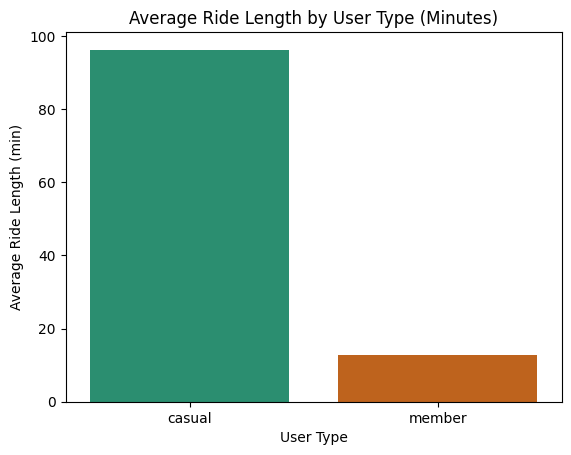

In [ ]:
sns.barplot(data= avg_ride_legth, x="member_casual", y="ride_length", hue="member_casual",
             palette="Dark2", legend=False)
plt.title("Average Ride Length by User Type (Minutes)")
plt.xlabel("User Type")
plt.ylabel("Average Ride Length (min)")
plt.show()

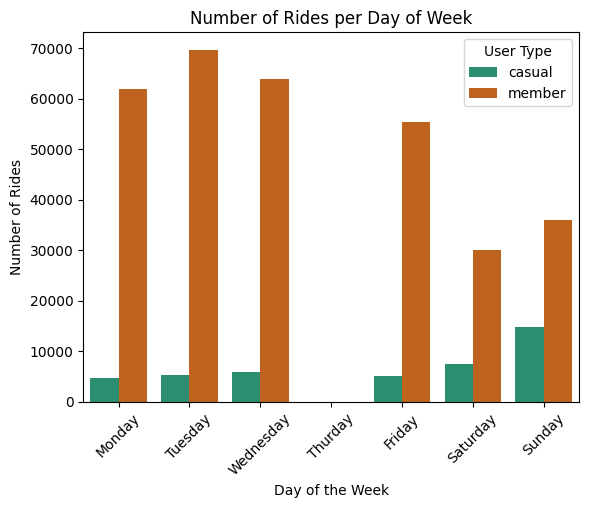

In [ ]:
rides_by_day = cyclist_cleaned.groupby(["member_casual", "day_of_week"])["ride_id"].count().reset_index()
rides_by_day.rename(columns={"ride_id": "ride_count"}, inplace= True)

days_order = ["Monday", "Tuesday", "Wednesday", "Thurday", "Friday", "Saturday", "Sunday"]
rides_by_day["day_of_week"] = pd.Categorical(rides_by_day["day_of_week"], categories=days_order, ordered=True)
rides_by_day = rides_by_day.sort_values("day_of_week")

sns.barplot(data=rides_by_day, x="day_of_week", y="ride_count", hue="member_casual", palette="Dark2")
plt.title("Number of Rides per Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

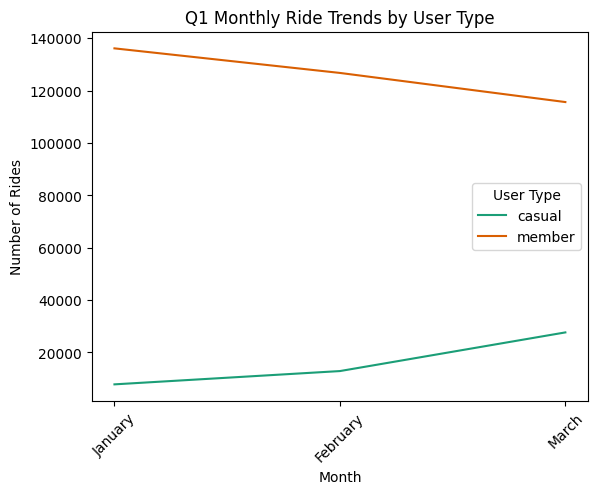

In [ ]:
cyclist_cleaned["month"] = pd.to_datetime(cyclist_cleaned["started_at"]).dt.month_name()
rides_by_month = cyclist_cleaned.groupby(["member_casual", "month"])["ride_id"].count().reset_index()
rides_by_month.rename(columns={"ride_id": "ride_count"}, inplace=True)

Month_order = ["January", "February", "March"]
rides_by_month["month"] = pd.Categorical(rides_by_month["month"], categories=Month_order, ordered=True)
rides_by_month = rides_by_month.sort_values("month")

sns.lineplot(data=rides_by_month, x="month", y="ride_count", hue="member_casual", markers="o", palette="Dark2")
plt.title("Q1 Monthly Ride Trends by User Type")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

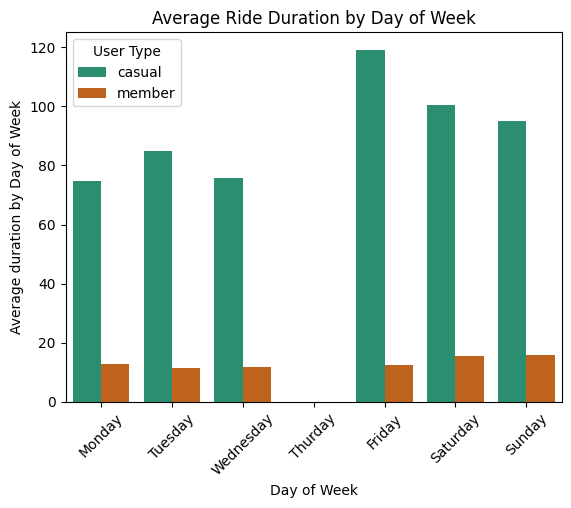

In [ ]:
avg_by_day = cyclist_cleaned.groupby(["member_casual", "day_of_week"])["ride_length"].mean().reset_index()
avg_by_day["day_of_week"] = pd.Categorical(avg_by_day["day_of_week"], categories=days_order, ordered=True)

sns.barplot(data=avg_by_day, x="day_of_week", y="ride_length", hue="member_casual", palette="Dark2")
plt.title("Average Ride Duration by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average duration by Day of Week")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

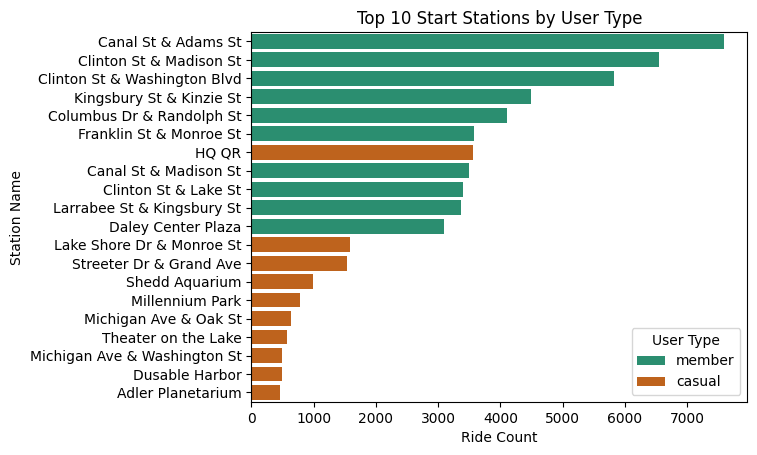

In [ ]:
# 
top_stations = cyclist_cleaned.groupby(["member_casual", "start_station_name"])["ride_id"].count().reset_index()
top_stations.rename(columns={"ride_id": "ride_count"}, inplace=True)
top_stations = top_stations.sort_values("ride_count", ascending=False).groupby("member_casual").head(10)

sns.barplot(data=top_stations, y="start_station_name", x="ride_count", hue="member_casual", palette="Dark2")
plt.title("Top 10 Start Stations by User Type")
plt.xlabel("Ride Count")
plt.ylabel("Station Name")
plt.legend(title="User Type")
plt.show()


In [ ]:
avg_ride_legth.to_csv("avg_ride_legth.csv", index=False)
rides_by_day.to_csv("rides_by_day.csv", index=False)
rides_by_month.to_csv("rides_by_month.csv", index=False)
print("Summary tables saved for visualization and reporting")

Summary tables saved for visualization and reporting
